Davianka Lopez
1. Core Describing Distributions
2. Sptember 3, 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
df = pd.read_csv('/Users/daviankalopez/Documents/DataEnrichment/data CORE.csv',header=1)
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

In [4]:
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['State', 'Area', 'Marital', 'Gender', 'Initial_admin',
       'Complication_risk', 'Services'],
      dtype='object')

In [5]:
df.shape

(1000, 32)

In [6]:
df.describe()

,Lat,Lng,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,...,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Additional_charges
count,1000.000000,1000.000000,993.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,...,994.00000,998.000000,992.000000,998.000000,994.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38.989277,-91.165542,2.103726,54.084000,40653.044950,0.0,17.992381,4.992000,1.024000,0.366000,...,0.28169,0.346693,0.414315,0.326653,0.396378,0.422000,0.308000,9.267176,3240.971613,13124.934863
std,5.504177,15.451957,2.239293,20.903203,28370.102213,0.0,2.056366,1.048349,1.013139,0.598667,...,0.45005,0.476156,0.492852,0.469224,0.489391,0.494126,0.461898,6.030931,600.413722,6677.691402
min,18.010230,-171.688150,0.000000,18.000000,154.080000,0.0,11.475314,2.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.012586,2022.650007,3241.339760
25%,35.673860,-96.840598,0.000000,36.750000,19295.567500,0.0,16.620469,4.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.518085,2822.108670,8121.383834
50%,39.524835,-88.242890,1.000000,55.000000,34222.550000,0.0,18.020163,5.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.042516,3164.679245,11698.462430
75%,42.130840,-80.602785,3.000000,72.000000,54924.115000,0.0,19.418254,6.000000,2.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.711671,3628.550654,16493.908180
max,70.560990,-66.247510,10.000000,89.000000,204542.410000,0.0,24.565463,9.000000,7.000000,3.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.269743,5572.846022,30087.650940


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

In [8]:
for col in df.columns:
    print(col)

State
Lat
Lng
Area
Children
Age
Income
Marital
Gender
ReAdmis
VitD_levels
Doc_visits
Full_meals_eaten
vitD_supp
Soft_drink
Initial_admin
HighBlood
Stroke
Complication_risk
Overweight
Arthritis
Diabetes
Hyperlipidemia
BackPain
Anxiety
Allergic_rhinitis
Reflux_esophagitis
Asthma
Services
Initial_days
TotalCharge
Additional_charges


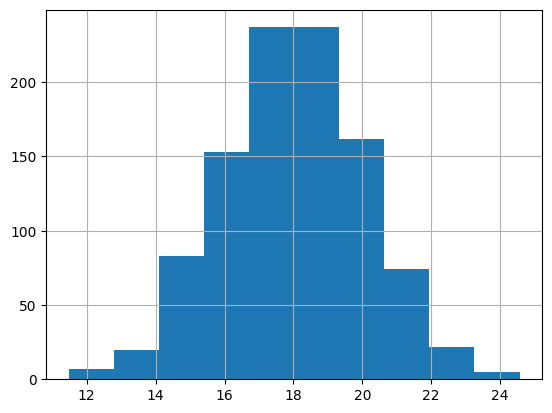

In [9]:
df['VitD_levels'].hist();

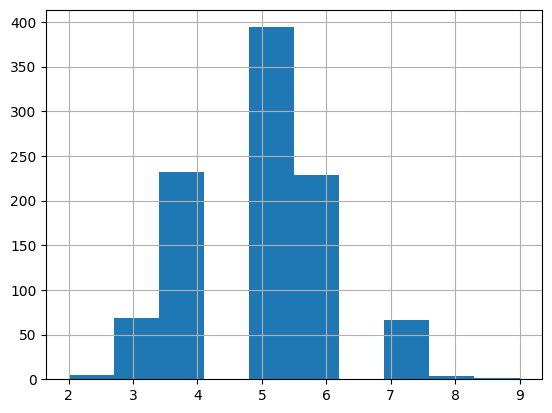

In [10]:
df['Doc_visits'].hist();

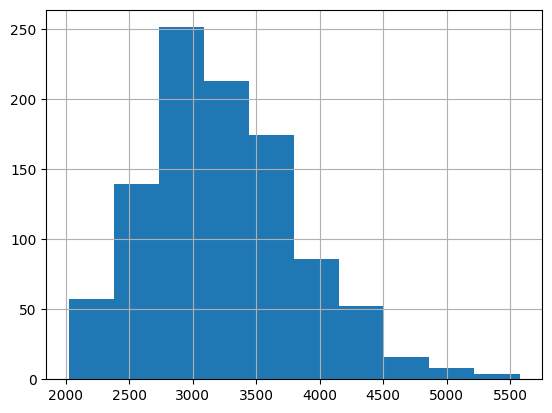

In [11]:
df['TotalCharge'].hist();

For each feature listed:

-1.Plot a histogram with a kde (kernel density estimate)
-2.Add a line for the mean (red)
-3.Add a line for the median (green)
-4.Add a line for for +1 std from the mean (black)
-5.Add a line for the - 1 std from the mean (black)
-6.Highlight the range between +1 and =1 std (yellow)
 

part B.Answer the following questions:
    -8.Is it Discrete or Continuous?
    -9.Does it have a skew? If so, which direction (+/-)
    -10.What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

## 1-6 for each of the columns above


Plot a histogram with a kde (kernel density estimate
    
    --2.Add a line for the mean (red) 
    --3.Add a line for the median (green) 
    --4.Add a line for for +1 std from the mean (black)     
    --5.Add a line for the - 1 std from the mean (black)  
    --6.Highlight the range between +1 and =1 std (yellow) 

## VitD_levels

Questions Answered 

-8.this is an example of continuous distribution.

-9.Normal Skewed

10. this data seems to be mesokurtic.  Distributed normally

In [12]:
mean = df['VitD_levels'].mean()
std = df['VitD_levels'].std()
plus_one_std = mean + std
minus_one_std = mean - std

In [13]:
dist_stats=df['VitD_levels'].agg(['mean','min','std', 'max','median'])
dist_stats

mean      17.992381
min       11.475314
std        2.056366
max       24.565463
median    18.020163
Name: VitD_levels, dtype: float64

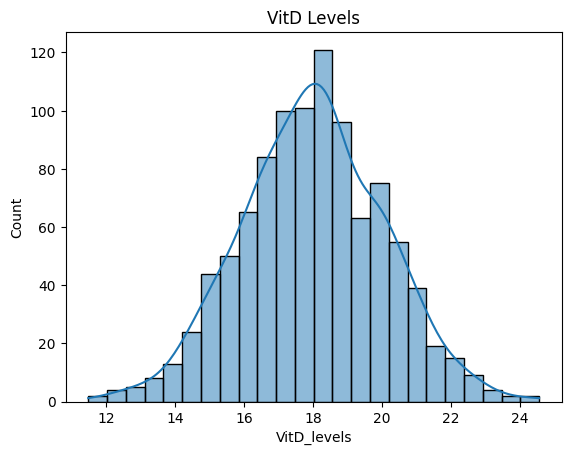

In [30]:
ax = sns.histplot(x=df['VitD_levels'],kde=True)
ax.set_title("VitD Levels");

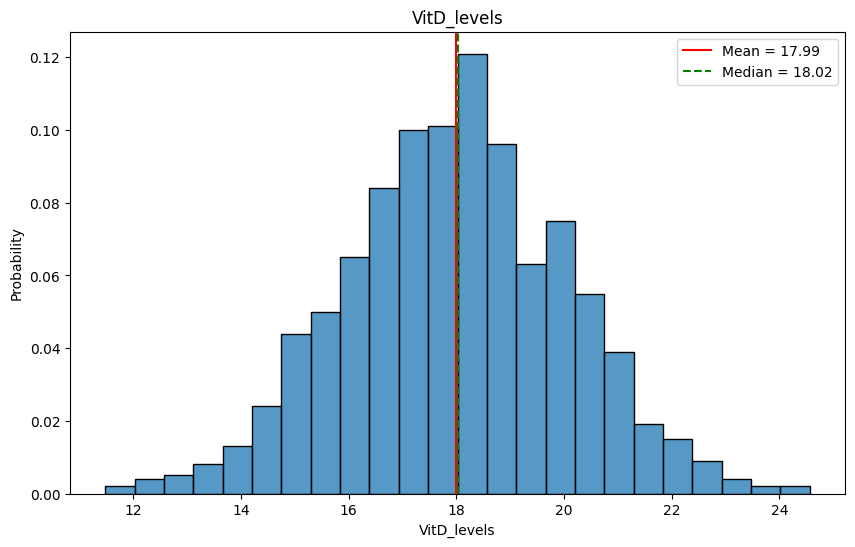

In [14]:
col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability')
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.set_title(f'{col}')
ax.legend();

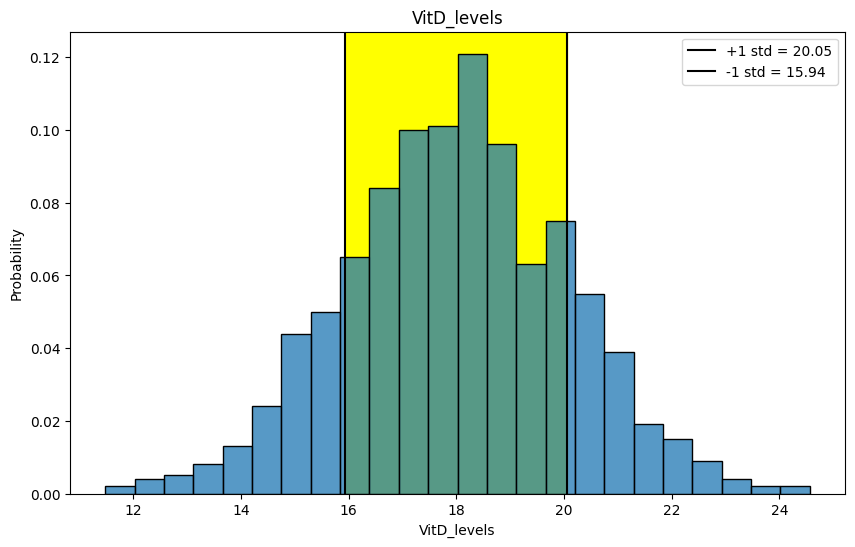

In [15]:
col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow',  zorder = 0)
ax.set_title(f'{col}')
ax.legend();

## Doc Visits


-8.this is an example of discrete distribution.

-9. Positively Skewed.

10. this data seems to be leptokurtic.  

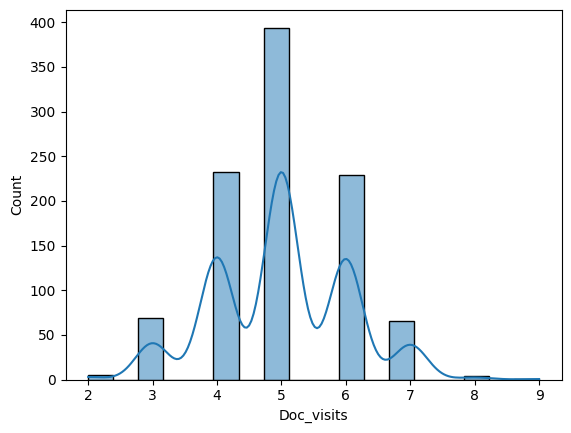

In [16]:
sns.histplot(data=df, x='Doc_visits', kde=True, );

In [17]:
mean = df['Doc_visits'].mean()
std = df['Doc_visits'].std()
plus_one_std = mean + std
minus_one_std = mean - std

In [18]:
dist_stats=df['Doc_visits'].agg(['mean','min','std', 'max','median'])
dist_stats

mean      4.992000
min       2.000000
std       1.048349
max       9.000000
median    5.000000
Name: Doc_visits, dtype: float64

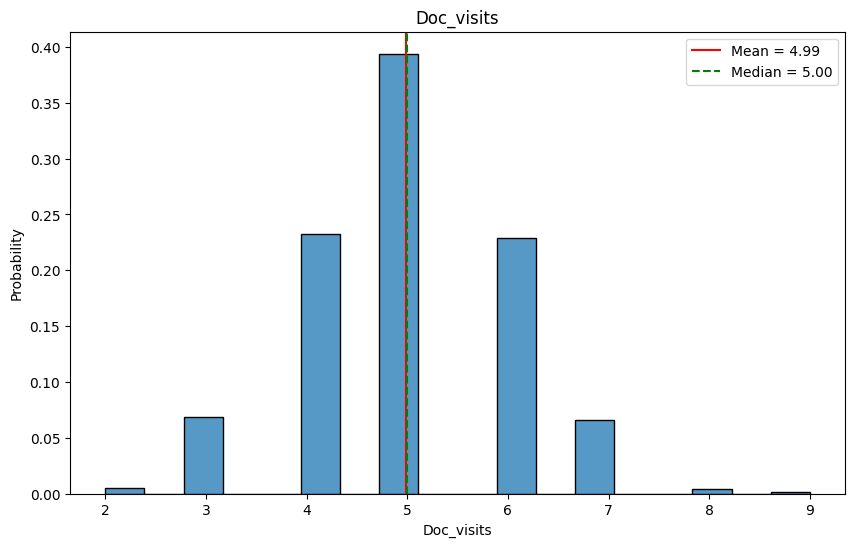

In [19]:
col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability')
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.set_title(f'{col}')
ax.legend();

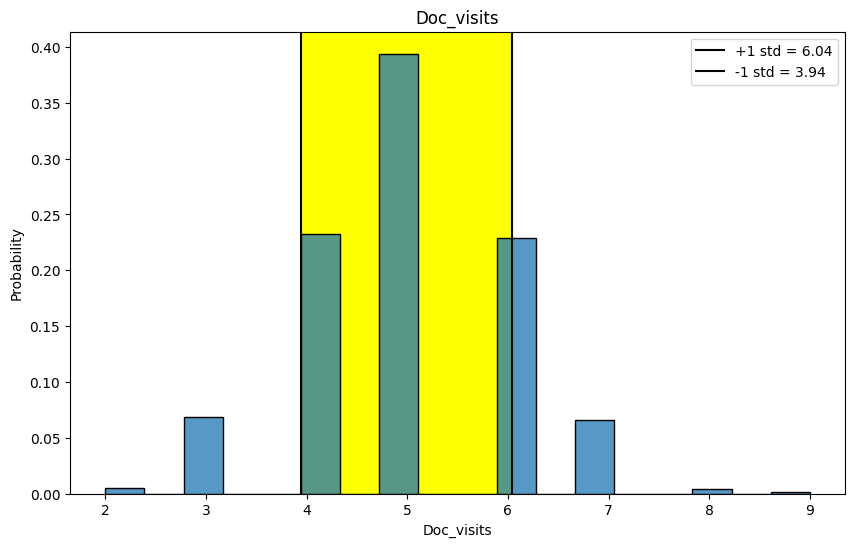

In [20]:
col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow',  zorder = 0)
ax.set_title(f'{col}')
ax.legend();

## Total Charge

-8.this is an example of continuous distribution.

-9. Positively Skewed.

10. this data seems to be Mesokurtic.  Distributed normally

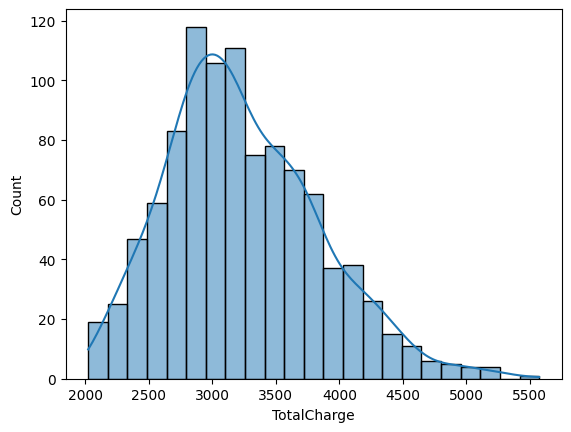

In [21]:
sns.histplot(data=df, x='TotalCharge', kde=True, );

In [22]:
mean = df['TotalCharge'].mean()
std = df['TotalCharge'].std()
plus_one_std = mean + std
minus_one_std = mean - std

In [23]:
dist_stats=df['TotalCharge'].agg(['mean','min','std', 'max','median'])
dist_stats

mean      3240.971613
min       2022.650007
std        600.413722
max       5572.846022
median    3164.679245
Name: TotalCharge, dtype: float64

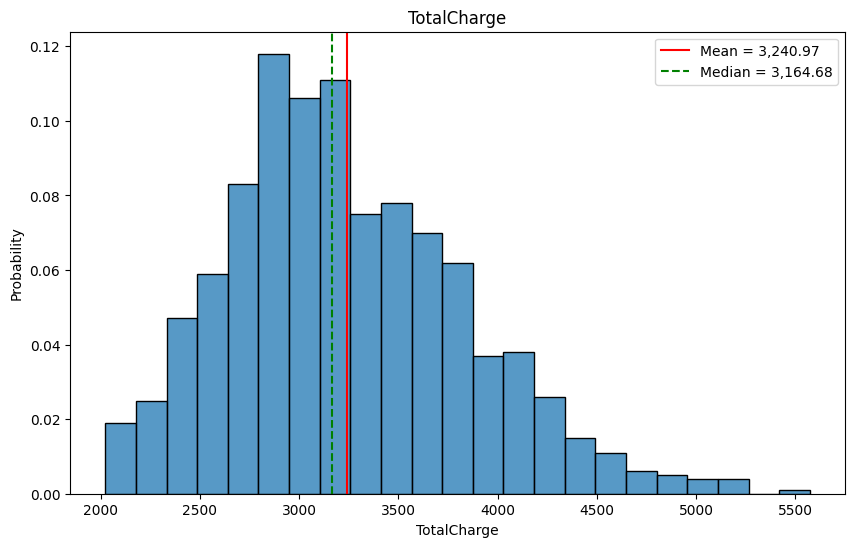

In [24]:
col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability')
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.set_title(f'{col}')
ax.legend();

In [25]:
total_data=df['TotalCharge']

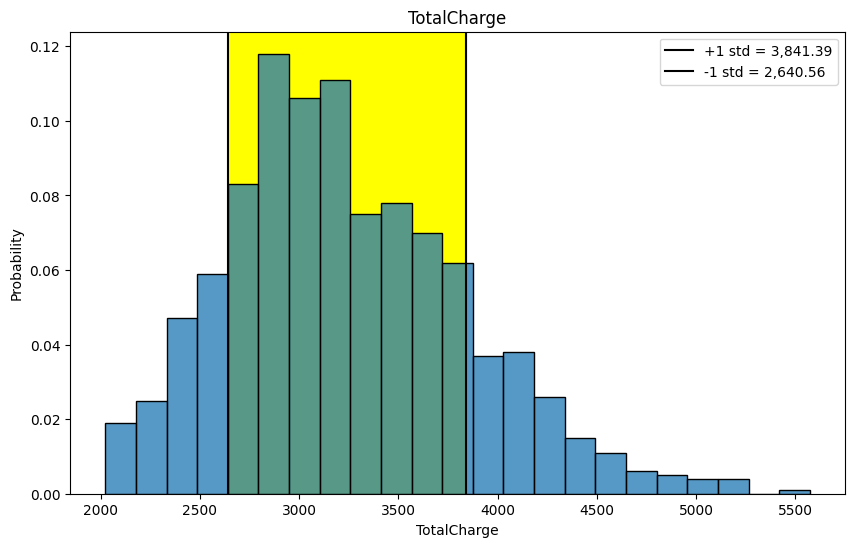

In [26]:
col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow',  zorder = 0)
ax.set_title(f'{col}')
ax.legend();